# Part one

In [127]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [239]:
g20=pd.read_csv('D:/Download/notebooks/data/cus_good20.csv',index_col = 0)
b20=pd.read_csv('D:/Download/notebooks/data/cus_bad20.csv',index_col = 0)
g20

,Company_Name,Trust_Score,No_of_Reviews
1,Union 22,TrustScore 4.9,505 reviews
2,A.K. RIKK's,TrustScore 4.9,282 reviews
3,Hastamuerte,TrustScore 4.8,974 reviews
4,Otrium,TrustScore 4.8,929 reviews
5,Angeljackets,TrustScore 4.8,743 reviews
6,Lebo's,TrustScore 4.8,742 reviews
7,CelticClothing.com,TrustScore 4.8,366 reviews
8,USA Kilts,TrustScore 4.8,205 reviews
9,New Horizons Trading,TrustScore 4.8,60 reviews
10,JAXXON,TrustScore 4.7,30224 reviews


In [240]:
def scoreTC(x):
    import re
    a = re.search('[\d.]+', x).group()
    return float(a)

def scoreRE(x):
    import re
    a = re.search('[\d]+ ', x).group()
    return float(a)

g20['Trust_Score']=g20['Trust_Score'].apply(scoreTC)
b20['Trust_Score']=b20['Trust_Score'].apply(scoreTC)
g20['No_of_Reviews']=g20['No_of_Reviews'].apply(scoreRE)
b20['No_of_Reviews']=b20['No_of_Reviews'].apply(scoreRE)
g20['Type']='Good'
b20['Type']='Bad'
result = pd.concat([g20,b20],ignore_index=True)
result

,Company_Name,Trust_Score,No_of_Reviews,Type
0,Union 22,4.9,505.0,Good
1,A.K. RIKK's,4.9,282.0,Good
2,Hastamuerte,4.8,974.0,Good
3,Otrium,4.8,929.0,Good
4,Angeljackets,4.8,743.0,Good
5,Lebo's,4.8,742.0,Good
6,CelticClothing.com,4.8,366.0,Good
7,USA Kilts,4.8,205.0,Good
8,New Horizons Trading,4.8,60.0,Good
9,JAXXON,4.7,30224.0,Good


### Good and bad reviews count

[1925.0, 41708.0]


Text(0.5, 1.0, 'Best 20 and Worst 20 Reviews average')

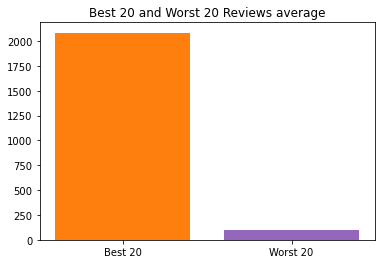

In [247]:
a=result.groupby('Type')['No_of_Reviews'].mean()
b=result.groupby('Type')['No_of_Reviews'].sum()
cou={'Best 20':int(a[1]),'Worst 20':int(a[0])}
print(list(b))
types = list(cou.keys())
value = list(cou.values())
plot.bar(range(len(cou)), value, tick_label=types, color=['tab:orange','tab:purple'])
plot.title('Best 20 and Worst 20 Reviews average')

[11.0, 536.0]


Text(0.5, 1.0, 'Best 20 and Worst 20 Reviews median')

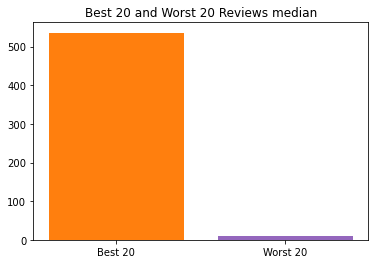

In [248]:
a=result.groupby('Type')['No_of_Reviews'].median()
b=result.groupby('Type')['No_of_Reviews'].sum()
cou={'Best 20':int(a[1]),'Worst 20':int(a[0])}
print(list(a))
types = list(cou.keys())
value = list(cou.values())
plot.bar(range(len(cou)), value, tick_label=types, color=['tab:orange','tab:purple'])
plot.title('Best 20 and Worst 20 Reviews median')

# Part two

In [265]:
import numpy as np
Best20=pd.read_csv('D:/Download/notebooks/data/best_comments.csv',index_col=0).reset_index().drop('Number',axis=1)
Best20

,Comments
0,All this place does is double the price of Ama...
1,The jacket purchased for my husband fits perfe...
2,I received my order from Angel Jackets and hav...
3,I'm a new customer but am so impressed with th...
4,It is greatI ordered a leather jacked. I order...
...,...
395,Great website and customer service. Very speed...
396,Luxire has once again been the best service I’...
397,My first order with Luxire-a pair of trousers ...
398,Fantastic made-to-measure service. Ordered a c...


# AFINN score (Sentiment analysis)

## Best 20 comments sentiment analysis

In [266]:
from sklearn.feature_extraction.text import TfidfVectorizer
from afinn import Afinn

def wordCount(x):
    import re
    y=re.sub('[^a-zA-Z0-9]',' ',x).strip()
    x=y.replace('  ',' ').split(' ')
    return len(x)

def find_best_std(x):
    return (x- total_best_average)/total_best_std

afinn = Afinn(language='en')
Best20['score']=Best20['Comments'].apply(afinn.score)
Best20['wordcount']=Best20['Comments'].apply(wordCount)
Best20['afinn_adjusted'] = Best20['score'] / Best20['wordcount'] * 100
total_best_average = Best20.afinn_adjusted.mean()
total_best_std = Best20.afinn_adjusted.std()
Best20['Z_score'] = Best20['afinn_adjusted'].apply(find_best_std)
Best20

,Comments,score,wordcount,afinn_adjusted,Z_score
0,All this place does is double the price of Ama...,1.0,107,0.934579,-1.121361
1,The jacket purchased for my husband fits perfe...,5.0,47,10.638298,-0.557934
2,I received my order from Angel Jackets and hav...,12.0,46,26.086957,0.339062
3,I'm a new customer but am so impressed with th...,7.0,41,17.073171,-0.184306
4,It is greatI ordered a leather jacked. I order...,6.0,48,12.500000,-0.449838
...,...,...,...,...,...
395,Great website and customer service. Very speed...,11.0,43,25.581395,0.309707
396,Luxire has once again been the best service I’...,19.0,105,18.095238,-0.124961
397,My first order with Luxire-a pair of trousers ...,13.0,105,12.380952,-0.456750
398,Fantastic made-to-measure service. Ordered a c...,16.0,98,16.326531,-0.227658


### Best 20 retails only have 16 negative comments

In [277]:
Best20[Best20.afinn_adjusted<0].count()

Comments          16
score             16
wordcount         16
afinn_adjusted    16
Z_score           16
dtype: int64

### Export outliers of Best 20

In [273]:
Best20[Best20.Z_score < -2].Comments.to_csv('Best_20_outliers.csv')

## Worst 20 retails comments sentiment analysis

In [212]:
import numpy as np
Worst20=pd.read_csv('D:/Download/notebooks/data/worst_comments.csv',index_col=0,encoding = 'unicode_escape').reset_index().drop('Number',axis=1)
Worst20

,Comments
0,"I bought summer trousers totally satisfied, lo..."
1,Have very good experience with wings Stuff is ...
2,Product Awesome Packing jst amazing so soft nd...
3,The best quality with a reasonable price. Outc...
4,I got a beautiful lovely leather wallet. Packi...
...,...
759,First time ordering from camp saver and though...
760,I??d give a zero if it was possible. 2 months...
761,I ordered a duffel bag 4 weeks ago and its tak...
762,Most bad I reviews I read are during covid tim...


In [250]:
afinn = Afinn(language='en')
Worst20['score']=Worst20['Comments'].apply(afinn.score)
Worst20['wordcount']=Worst20['Comments'].apply(wordCount)
Worst20['afinn_adjusted'] = Worst20['score'] / Worst20['wordcount'] * 100
def find_worst_std(x):
    return (x- total_worst_average)/total_worst_std
total_worst_average = Worst20.afinn_adjusted.mean()
total_worst_std = Worst20.afinn_adjusted.std()
Worst20['Z_score'] = Worst20['afinn_adjusted'].apply(find_std)
Worst20
print(total_worst_average,total_worst_std)

6.310979667821452 18.388199816712596


Text(0.5, 1.0, 'Z-score of Afinn adjusted value taken from Best 20 and Worst 20 ')

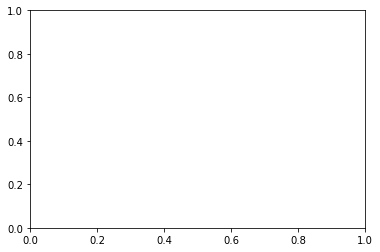

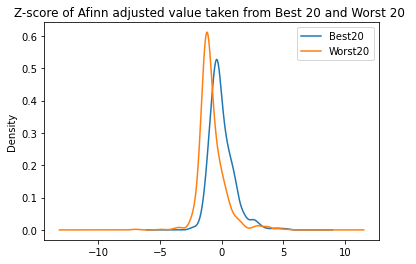

In [214]:
fig,ax = plot.subplots()
best_z_score=pd.Series(Best20.Z_score)
worst_z_score=pd.Series(Worst20.Z_score)
total_20=pd.DataFrame({'Best20':best_z_score,'Worst20':worst_z_score})
ax= total_20.plot.kde()
plot.title('Z-score of Afinn adjusted value taken from Best 20 and Worst 20 ')

### Worst 20 retails have 267 negative comments

In [236]:
Worst20[Worst20.afinn_adjusted<0].count()
Worst20[Worst20.afinn_adjusted<0]

Comments          267
score             267
wordcount         267
afinn_adjusted    267
Z_score           267
dtype: int64

### Export outliers of Worst 20

In [275]:
Worst20[Worst20.Z_score >2].Comments.to_csv('Worst20_outliers.csv')

# Analysis

### Whole data visulization

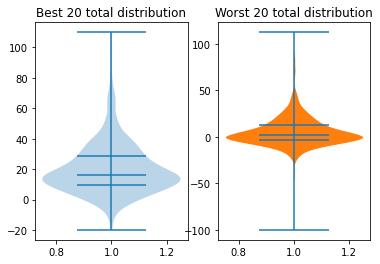

In [218]:
a00=Best20.afinn_adjusted
score00=[float(x) for x in a00]
a01=Worst20.afinn_adjusted
score01=[float(x) for x in a01]
fig,ax = plot.subplots(nrows=1,ncols=2)
ax[0].set_title('Best 20 total distribution')
parts0 = ax[0].violinplot(score00,quantiles=[0.25,0.5,0.75])
ax[1].set_title('Worst 20 total distribution')
parts1 = ax[1].violinplot(score01,quantiles=[0.25,0.5,0.75])
for pc in parts1['bodies']:
    pc.set_facecolor('tab:orange')
    pc.set_edgecolor('white')
    pc.set_alpha(1)

### Positive comments analysis

In [219]:
Bmean=Best20[Best20.afinn_adjusted>0].afinn_adjusted.mean()
Bmin=Best20[Best20.afinn_adjusted>0].afinn_adjusted.min()
Bmax=Best20[Best20.afinn_adjusted>0].afinn_adjusted.max()
Bmedian=Best20[Best20.afinn_adjusted>0].afinn_adjusted.median()
Summarise = {'Best 20 positive comments mean is:':Bmean,'Best 20 positive comments max is:':Bmax,'Best 20 positive comments median is:':Bmedian,'Best 20 positive comments min is:':Bmin}
for key in Summarise:
    print(key,Summarise[key])

Best 20 positive comments mean is: 21.820408841812245
Best 20 positive comments max is: 110.00000000000001
Best 20 positive comments median is: 16.844864809293718
Best 20 positive comments min is: 0.7462686567164178


{'bodies': [<matplotlib.collections.PolyCollection at 0x2a2f36297c0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2a2f3636850>,
 'cmins': <matplotlib.collections.LineCollection at 0x2a2f3636e20>,
 'cbars': <matplotlib.collections.LineCollection at 0x2a2f3644220>,
 'cquantiles': <matplotlib.collections.LineCollection at 0x2a2f36445e0>}

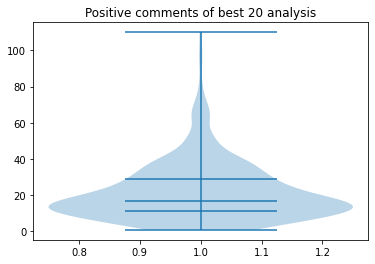

In [220]:
a1=Best20[Best20.afinn_adjusted>0].afinn_adjusted
score1=[float(x) for x in a1]
fig,ax = plot.subplots()
ax.set_title('Positive comments of best 20 analysis')
ax.violinplot(score1,quantiles=[0.25,0.5,0.75])

In [221]:
Wmean=Worst20[Worst20.afinn_adjusted>0].afinn_adjusted.mean()
Wmin=Worst20[Worst20.afinn_adjusted>0].afinn_adjusted.min()
Wmax=Worst20[Worst20.afinn_adjusted>0].afinn_adjusted.max()
Wmedian=Worst20[Worst20.afinn_adjusted>0].afinn_adjusted.median()
Summarise = {'Worst 20 positive comments mean is:':Wmean,'Worst 20 positive comments max is:':Wmax,'Worst 20 positive comments median is:':Wmedian,'Worst 20 positive comments min is:':Wmin}
for key in Summarise:
    print(key,Summarise[key])

Worst 20 positive comments mean is: 16.576240819546964
Worst 20 positive comments max is: 112.5
Worst 20 positive comments median is: 11.45104895104895
Worst 20 positive comments min is: 0.4608294930875576


{'bodies': [<matplotlib.collections.PolyCollection at 0x2a2f36a7400>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2a2f369c3d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2a2f36a7ac0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2a2f36a7e80>,
 'cquantiles': <matplotlib.collections.LineCollection at 0x2a2f36b6280>}

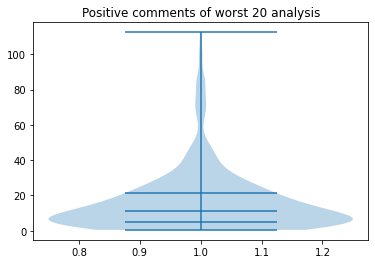

In [222]:
a2=Worst20[Worst20.afinn_adjusted>0].afinn_adjusted
score2=[float(x) for x in a2]
fig,ax = plot.subplots()
ax.set_title('Positive comments of worst 20 analysis')
ax.violinplot(score2,quantiles=[0.25,0.5,0.75])

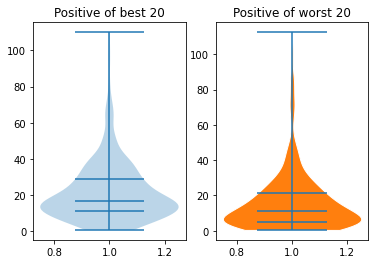

In [223]:
fig,ax = plot.subplots(nrows=1,ncols=2)
ax[0].set_title('Positive of best 20')
parts0 = ax[0].violinplot(score1,quantiles=[0.25,0.5,0.75])
ax[1].set_title('Positive of worst 20')
#ax[1].violinplot(score2,quantiles=[0.25,0.5,0.75])
parts1 = ax[1].violinplot(score2,quantiles=[0.25,0.5,0.75])
for pc in parts1['bodies']:
    pc.set_facecolor('tab:orange')
    pc.set_edgecolor('white')
    pc.set_alpha(1)

### Negative comments analysis

In [224]:
Bmean=Best20[Best20.afinn_adjusted<0].afinn_adjusted.mean()
Bmin=Best20[Best20.afinn_adjusted<0].afinn_adjusted.min()
Bmax=Best20[Best20.afinn_adjusted<0].afinn_adjusted.max()
Bmedian=Best20[Best20.afinn_adjusted<0].afinn_adjusted.median()
Summarise = {'Best 20 negative comments mean is:':Bmean,'Best 20 negative comments max is:':Bmax,'Best 20 negative comments median is:':Bmedian,'Best 20 negative comments min is:':Bmin}
for key in Summarise:
    print(key,Summarise[key])


Best 20 negative comments mean is: -6.594482069025773
Best 20 negative comments max is: -1.694915254237288
Best 20 negative comments median is: -4.967948717948717
Best 20 negative comments min is: -20.0


{'bodies': [<matplotlib.collections.PolyCollection at 0x2a2f37dd640>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2a2f37d05e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2a2f37ddd00>,
 'cbars': <matplotlib.collections.LineCollection at 0x2a2f37ec100>,
 'cquantiles': <matplotlib.collections.LineCollection at 0x2a2f37ec4c0>}

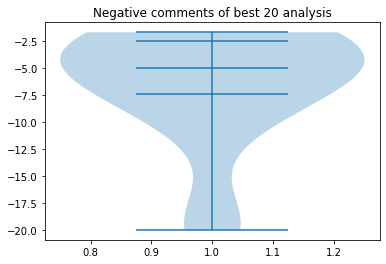

In [225]:
a3=Best20[Best20.afinn_adjusted<0].afinn_adjusted
score3=[float(x) for x in a3]
fig,ax = plot.subplots()
ax.set_title('Negative comments of best 20 analysis')
ax.violinplot(score3,quantiles=[0.25,0.5,0.75])

In [226]:
Wmean=Worst20[Worst20.afinn_adjusted<0].afinn_adjusted.mean()
Wmin=Worst20[Worst20.afinn_adjusted<0].afinn_adjusted.min()
Wmax=Worst20[Worst20.afinn_adjusted<0].afinn_adjusted.max()
Wmedian=Worst20[Worst20.afinn_adjusted<0].afinn_adjusted.median()
Summarise = {'Worst 20 negative comments mean is:':Wmean,'Worst 20 negative comments max is:':Wmax,'Worst 20 negative comments median is:':Wmedian,'Worst 20 negative comments min is:':Wmin}
for key in Summarise:
    print(key,Summarise[key])

Worst 20 negative comments mean is: -8.016601790240204
Worst 20 negative comments max is: -0.5102040816326531
Worst 20 negative comments median is: -5.64516129032258
Worst 20 negative comments min is: -100.0


{'bodies': [<matplotlib.collections.PolyCollection at 0x2a2f383beb0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2a2f384a040>,
 'cmins': <matplotlib.collections.LineCollection at 0x2a2f3857670>,
 'cbars': <matplotlib.collections.LineCollection at 0x2a2f3857a30>,
 'cquantiles': <matplotlib.collections.LineCollection at 0x2a2f3857df0>}

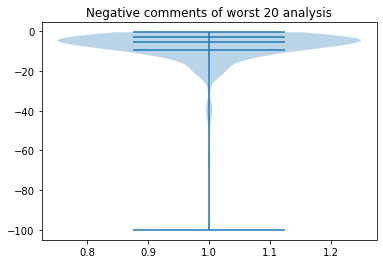

In [227]:
a4=Worst20[Worst20.afinn_adjusted<0].afinn_adjusted
score4=[float(x) for x in a4]
fig,ax = plot.subplots()
ax.set_title('Negative comments of worst 20 analysis')
ax.violinplot(score4,quantiles=[0.25,0.5,0.75])

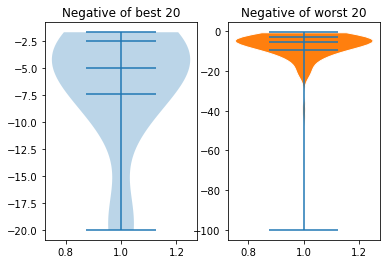

In [228]:
fig,ax = plot.subplots(nrows=1,ncols=2)
ax[0].set_title('Negative of best 20')
parts0 = ax[0].violinplot(score3,quantiles=[0.25,0.5,0.75])
ax[1].set_title('Negative of worst 20')
parts1 = ax[1].violinplot(score4,quantiles=[0.25,0.5,0.75])
for pc in parts1['bodies']:
    pc.set_facecolor('tab:orange')
    pc.set_edgecolor('white')
    pc.set_alpha(1)

## kde plot

Text(0.5, 1.0, 'Best 20 and Worst 20 total Afinn score distribution')

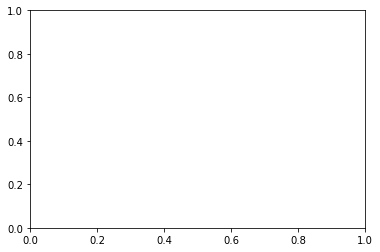

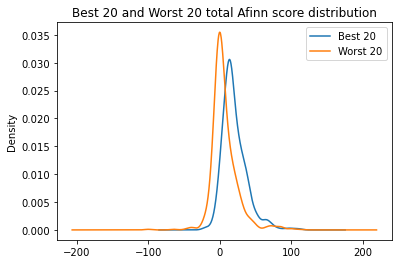

In [229]:
fig,ax = plot.subplots()
score00=pd.Series(score00)
score01=pd.Series(score01)
fig1 = pd.DataFrame({'Best 20':score00,'Worst 20': score01})
ax= fig1.plot.kde()
plot.title('Best 20 and Worst 20 total Afinn score distribution')

Text(0.5, 1.0, 'Best 20 and Worst 20 Positive Afinn score distribution')

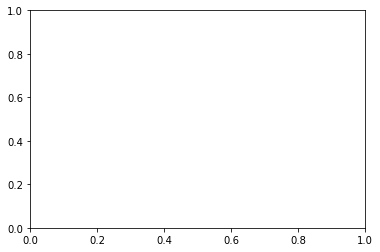

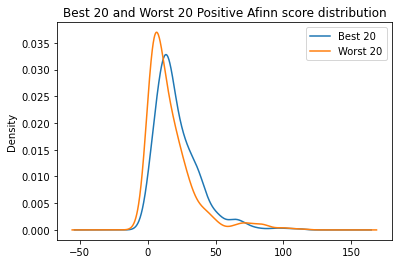

In [230]:
fig,ax = plot.subplots()
score1=pd.Series(score1)
score2=pd.Series(score2)
fig2 = pd.DataFrame({'Best 20':score1,'Worst 20': score2})
ax= fig2.plot.kde()
plot.title('Best 20 and Worst 20 Positive Afinn score distribution')
#ax1= score1.plot.kde()
#ax2= score2.plot.kde()

Text(0.5, 1.0, 'Best 20 and Worst 20 Negative Afinn score distribution')

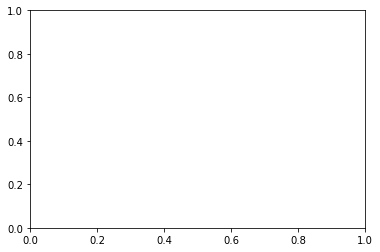

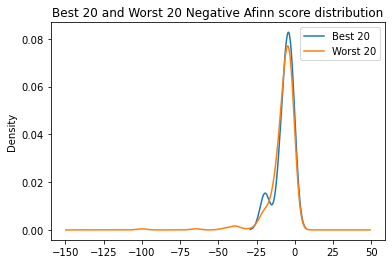

In [231]:
fig,ax = plot.subplots()
score3=pd.Series(score3)
score4=pd.Series(score4)
fig3 = pd.DataFrame({'Best 20':score3,'Worst 20': score4})
ax= fig3.plot.kde()
plot.title('Best 20 and Worst 20 Negative Afinn score distribution')
#ax1= score3.plot.kde()
#ax2= score4.plot.kde()